<a href="https://colab.research.google.com/github/Codec35/Complete-Python-3-Bootcamp/blob/master/Assignment1_PartA_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning 884**
# **Assignment 1 : Part A**

# Bannister Leonard Mwaanga

Introduction
This assignment will introduce and develop fundamental concepts behind convolutional neural networks using Keras with Tensorflow backend. Part-A uses the MNIST dataset.

The code was developed in Colab run with High RAM GPU 3ms/step.

Scope of Work
The work is organized and numbered as follow:

1.   Initialization - downloading necessary 
libraries and modules

2.   Data loading and normalizing

3.   Baseline model - create, train and evaluate baseline model

4.   My Model - create own model, train and evaluate model

5.   Summary of results - compare results



## 1. Initialization

In [ ]:
#Import libraries and modules
from __future__ import print_function
import keras
import tensorflow as tf
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential
from matplotlib import pyplot as plt
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, BatchNormalization


In [ ]:
#1.1 Define global variables
batch_size = 32
num_classes = 10
epochs = 32

## 2. Loading Dataset

In [ ]:
#2.1 Input image dimensions
img_rows, img_cols = 28, 28

#2.2 Load and split
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#2.3 Format dataset to one channel
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#2.4 Interger to float data type    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#2.5 One-hot categorizing
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## **Plot Loss Curve**

In [ ]:
#Define Plotting function to visualize test loss and accuracy curves
def plot_loss_curve():
  plt.subplot(211)
  plt.title('Categorical-crossentropy', pad=-40)
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.legend()
  

  # plot accuracy learning curves
  plt.subplot(212)
  plt.title('Accuracy', pad=-40)
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='test')
  plt.legend()
  
 

## 3. Baseline Model

Baseline Model topology;

*   2 Conv2D Layers + 1 DNN(128 nodes)
*   3x3 kernel filter
*   ReLU activation function
*   MaxPooling2D - downsample using a 2x2 matrix
*   2 Dropout layers - regularization layers
*   Cross-entropy loss function with softmax classification at final layer
*   Adadelta optimizer - SGD used to increase speed of computing SGD and avoid manually selecting learning rate




Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 15s 249us/step - loss: 0.1847 - accuracy: 0.9434 - val_loss: 0.0472 - val_accuracy: 0.9840
Epoch 2/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.0749 - accuracy: 0.9776 - val_loss: 0.0359 - val_accuracy: 0.9882
Epoch 3/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.0592 - accuracy: 0.9828 - val_loss: 0.0364 - val_accuracy: 0.9882
Epoch 4/50
60000/60000 [==============================] - 9s 143us/step - loss: 0.0529 - accuracy: 0.9847 - val_loss: 0.0309 - val_accuracy: 0.9896
Epoch 5/50
60000/60000 [==============================] - 9s 143us/step - loss: 0.0496 - accuracy: 0.9862 - val_loss: 0.0328 - val_accuracy: 0.9894
Epoch 6/50
60000/60000 [==============================] - 9s 143us/step - loss: 0.0481 - accuracy: 0.9858 - val_loss: 0.0325 - val_accuracy: 0.9901
Epoch 7/50
60000/60000 [==============================] - 9s 

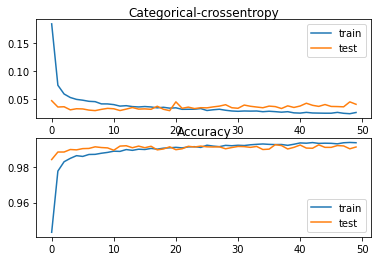

In [ ]:
#3.1 Define baseline model (extract from keras)
model = Sequential()

#Input layer Conv2D + 32-64filter(3,3) + relu + maxpooling + dropout
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Flatten layers to 1D and fit into Dense Neural Network
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

#Final output with softmax activation function
model.add(Dense(num_classes, activation='softmax'))

#3.2 Compile model with 
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#3.3 Train model
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,
          verbose=1,validation_data=(x_test, y_test))

#3.4 Evaluate model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot loss curve
plot_loss_curve()

## 4. My Model

My model had the following topology:

* 4 Conv2D Layers + 1 DNN(512 nodes)  
* 3x3 kernel filters
* ReLU activation function  
* MaxPooling2D - downsample using a 2x2 matrix 
* 2 Dropout layers - regularization layers
* Cross-entropy loss function with softmax classification at final layer
*Adadelta optimizer - used to increase speed of computing SGD and avoid manually selecting learning rate




Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.1.

Epoch 00019: ReduceLROnPlateau reducing learning rate to 0.010000000149011612.

Epoch 00024: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.

Epoch 00029: ReduceLROnPlateau reducing learning rate to 9.999999310821295e-05.
Test accuracy: 0.9943000078201294
Test loss: 0.021973866535974957


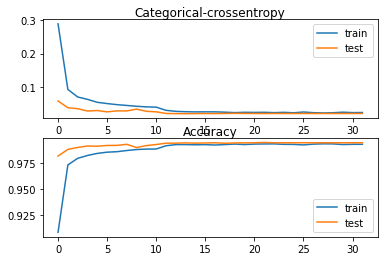

In [ ]:
#4.1 Define my model
#CNN->relu->MaxPool2d->Drop->DNN->Flatten->Dropout->Output
model = Sequential()

#Input layer Conv2D + 32->64filter(3,3) + relu + maxpooling + dropout
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

#Add layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

#Add layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

#Flatten layer + DNN
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

#Final output with softmax activation function
model.add(Dense(num_classes, activation='softmax'))

#3.2 Compile model with adadelta optimizer
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#3.3 Learning rate schedule used to make opt converge closest to global minimum of the loss
#    of loss function
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_delta=1E-7, verbose=1)

#3.4 Train model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          verbose=0,validation_data=(x_test, y_test),callbacks=[rlrp])

#3.5 Evaluate model
score = model.evaluate(x_test, y_test, verbose=0)

print('Test accuracy:', score[1])
print('Test loss:', score[0])

#Plot loss curve
plot_loss_curve()

## 5**. Summary**
With the above model topology I was able to achieve test accuracy of 99.4% after 32 epochs.

Steps taken to improve my model where as follows;
1. Increase Nodes and Layers;
>A model with more layers and more hidden units per layer has higher representational capacity - it is capable of representing more complicated functions.
— Page 428, Deep Learning, 2016.
                        
2. Improve learning rate
>The amount that each model parameter is updated per iteration of the learning algorithm (Chapter 5).
The training process must be repeated many times, making it difficult to calculate exactly how much to change each parameter model. By using the learning rate schedule I was able to control how much to update model weights, and in turn control how fast the model learns on the training dataset.

To further improve my model I tried to control the batch size.
>3. The batch size control the precision of the estimate of the error gradient, that in turn 
Batch size is typically chosen between 1 and a few hundreds, e.g. [batch size] = 32 is a good default value
— Practical recommendations for gradient-based training of deep architectures, 2012.

A summary of results for baseline model and my model is shown below run over 32 epochs;

1.   Baseline model = 99.17%
2.   My Model       = 99.3%
3.   My Model + Dropout + lr_schedule = 99.40%
 

